In [3]:
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime as dt
from tabulate import tabulate

<h1> QUESTIONS

* does the birth control work?
* what is likely to happen to these mustangs?
* what can be done to promote the interest in wild horses anad further increase their adoption and sale rate?

In [4]:
file = "BLMMustangBurro.xlsx"

In [5]:
mustang2020= pd.read_excel(file, sheet_name=0, index_col= "State")
yearlypop= pd.read_excel(file, sheet_name=1, index_col="Year")
birthcontrol= pd.read_excel(file, sheet_name=2, index_col= "Year")

removals= pd.read_excel(file, sheet_name=3, index_col= "Year")
adoptions= pd.read_excel(file, sheet_name=4, index_col="Year")
sold= pd.read_excel(file, sheet_name=5, index_col= "Year")

trained= pd.read_excel(file, sheet_name=6, index_col= "Year")
holding= pd.read_excel(file, sheet_name=7, index_col="Facility Type")


In [6]:
birthcontroldrop = birthcontrol[:-1]

In [7]:
birthcontroldrop

,PZP,PZP-22,Gonacon,Total
Year,,,,
2020,563,31,141,735
2019,549,59,52,660
2018,580,110,12,702
2017,422,355,0,777
2016,334,118,15,467
2015,286,183,0,469
2014,319,65,0,384
2013,199,310,0,509


In [8]:
#target_pzp = pd.DataFrame(birthcontrol.target, columns=["PZP"])
#target_pzp22 = pd.DataFrame(birthcontrol.target, columns=["PZP-22"])
#target_gonacon = pd.DataFrame(birthcontrol.target, columns=["Gonacon"])
#target_total = pd.DataFrame(birthcontrol.target, columns=["Total"])

target_pzp = pd.DataFrame(birthcontroldrop, columns=["PZP"])
target_pzp22 = pd.DataFrame(birthcontroldrop, columns=["PZP-22"])
target_gonacon = pd.DataFrame(birthcontroldrop, columns=["Gonacon"])
target_total = pd.DataFrame(birthcontroldrop, columns=["Total"])

In [9]:
pzp = stats.linregress(yearlypop["Total"],target_pzp["PZP"])

In [13]:
pzp.rvalue

0.9442175887515998

Text(0.5, 1.0, 'Amount of PZP Used vs Amount of Mustangs')

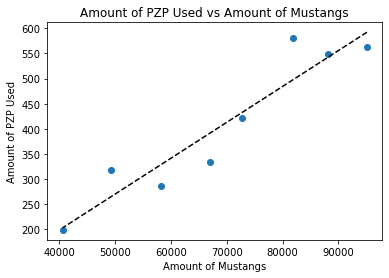

In [14]:
plt.plot(yearlypop["Total"], pzp.slope*yearlypop["Total"]+ pzp.intercept, 'k--')
plt.scatter(yearlypop["Total"], target_pzp["PZP"])
plt.xlabel("Amount of Mustangs")
plt.ylabel("Amount of PZP Used")
plt.title("Amount of PZP Used vs Amount of Mustangs")

In [15]:
pzp22 = stats.linregress(yearlypop["Total"], target_pzp22["PZP-22"])

Text(0.5, 1.0, 'Amount of PZP-22 Used vs Amount of Mustangs ')

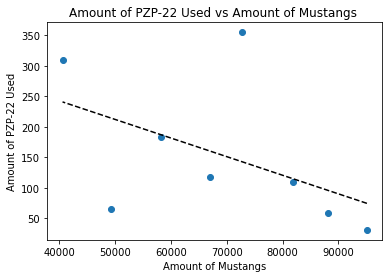

In [16]:
plt.plot(yearlypop["Total"], pzp22.slope*yearlypop["Total"]+ pzp22.intercept, 'k--')
plt.scatter(yearlypop["Total"], target_pzp22["PZP-22"])
plt.xlabel("Amount of Mustangs")
plt.ylabel("Amount of PZP-22 Used")
plt.title("Amount of PZP-22 Used vs Amount of Mustangs ")

In [21]:

gonacon = stats.linregress(yearlypop["Total"], target_gonacon["Gonacon"])

Text(0.5, 1.0, 'Amount of Gonacon Used vs Amount of Mustangs ')

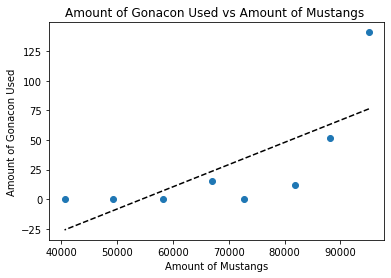

In [22]:
plt.plot(yearlypop["Total"], gonacon.slope*yearlypop["Total"]+ gonacon.intercept, 'k--')
plt.scatter(yearlypop["Total"], target_gonacon["Gonacon"])
plt.xlabel("Amount of Mustangs")
plt.ylabel("Amount of Gonacon Used")
plt.title("Amount of Gonacon Used vs Amount of Mustangs ")

In [23]:
total= stats.linregress(yearlypop["Total"], target_total["Total"])

Text(0.5, 1.0, 'Total Birth Control Used vs Amount of Mustangs ')

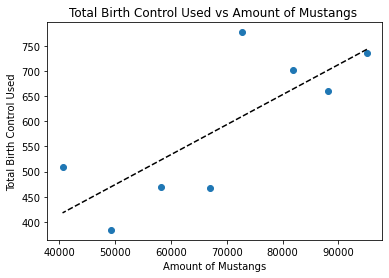

In [24]:
plt.plot(yearlypop["Total"], total.slope*yearlypop["Total"]+ total.intercept, 'k--')
plt.scatter(yearlypop["Total"], target_total["Total"])
plt.xlabel("Amount of Mustangs")
plt.ylabel("Total Birth Control Used")
plt.title("Total Birth Control Used vs Amount of Mustangs ")

In [25]:
pzp.stderr

0.0010165974465520687

In [26]:
table = [['type of Birth Control','p value', 'r value', 'standard error'], ['PZP',pzp.pvalue, pzp.rvalue, pzp.stderr], ['PZP-22',pzp22.pvalue, pzp22.rvalue, pzp22.stderr], ["Gonacon",gonacon.pvalue, gonacon.rvalue, gonacon.stderr], ["Total",total.pvalue, total.rvalue, total.stderr]]

In [27]:
print(tabulate(table))

---------------------  ----------------------  -------------------  ---------------------
type of Birth Control  p value                 r value              standard error
PZP                    0.00041598995935108503  0.9442175887515998   0.0010165974465520687
PZP-22                 0.22357013920538032     -0.4846324407326217  0.002247416454885814
Gonacon                0.04053491362714997     0.7281677688587385   0.0007208429938870538
Total                  0.024856575082545428    0.7717991251180902   0.0020064637746701726
---------------------  ----------------------  -------------------  ---------------------


In [28]:
horsenegative=removals+adoptions+sold

In [29]:
horse_total= yearlypop-horsenegative

Text(0.5, 1.0, 'Mustang Population on Public Land')

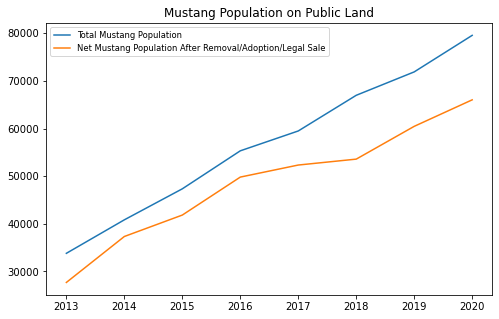

In [30]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(yearlypop["Horses"], label= "Total Mustang Population")
ax.plot(horse_total["Horses"], label= "Net Mustang Population After Removal/Adoption/Legal Sale")
#ax.plot(yearlypop["Burros"], label= "Burros pop")
#ax.plot(horse_total["Burros"], label= "net total Burros")

ax.legend(fontsize="small")
plt.title("Mustang Population on Public Land")

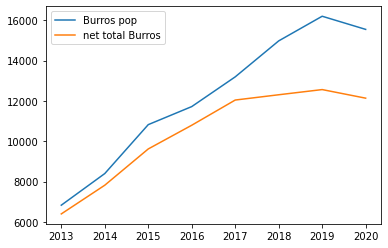

In [31]:
fig, ax = plt.subplots()
#ax.plot(yearlypop["Horses"], label= "horse pop")
#ax.plot(horse_total["Horses"], label= "net total horse")
ax.plot(yearlypop["Burros"], label= "Burros pop")
ax.plot(horse_total["Burros"], label= "net total Burros")

ax.legend()

In [32]:
#horsenegative.plot()

<AxesSubplot:title={'center':'Wild Mustangs and Burros on in Holding Facilities'}, xlabel='Facility Type'>

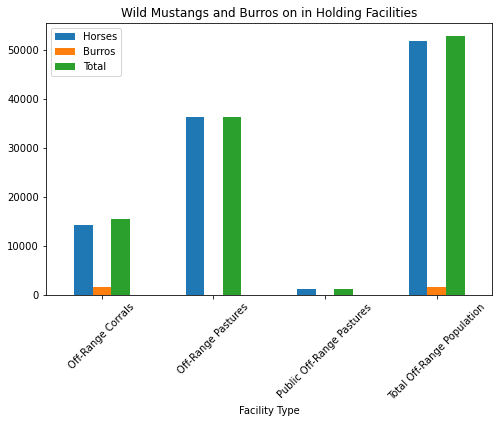

In [33]:
holding.plot(kind="bar", rot= 45, figsize=(8,5), title="Wild Mustangs and Burros on in Holding Facilities")

<AxesSubplot:title={'center':'Wild Mustangs and Burros on Public Lands in 2020'}, xlabel='State'>

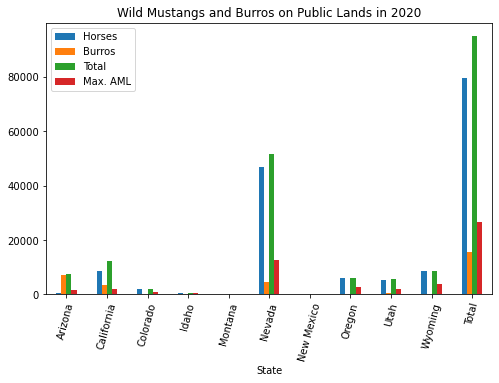

In [34]:

mustang2020.plot(kind="bar",rot= 75, figsize=(8,5), title="Wild Mustangs and Burros on Public Lands in 2020")

<AxesSubplot:xlabel='Year'>

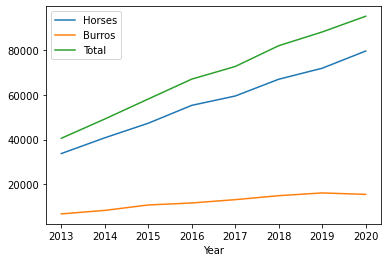

In [36]:


#make a plot with state areas, and mustang buroo population

yearlypop.plot()
